In [270]:
import pandas as pd
import numpy as np

sample_submission = pd.read_csv('sample_submission.csv')
test_data = pd.read_csv('test.csv', index_col='PassengerId')
train_data = pd.read_csv('train.csv', index_col='PassengerId')


test_data.head(20)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
100000,3,"Holliday, Daniel",male,19.0,0,0,24745,63.01,NaN,S
100001,3,"Nguyen, Lorraine",female,53.0,0,0,13264,5.81,NaN,S
100002,1,"Harris, Heather",female,19.0,0,0,25990,38.91,B15315,C
100003,2,"Larsen, Eric",male,25.0,0,0,314011,12.93,NaN,S
100004,1,"Cleary, Sarah",female,17.0,0,2,26203,26.89,B22515,C
100005,3,"Orabuena, John",male,34.0,0,0,NaN,10.40,NaN,C
100006,1,"Guerrero, Angel",female,48.0,1,2,PC 28237,221.94,B21146,S
100007,3,"Payton, Brian",male,13.0,0,0,42031,9.41,NaN,S
100008,3,"Murray, Barbara",female,16.0,1,0,C.A. 219645,12.31,NaN,S


In [271]:
y = sample_submission.Survived
sample_submission.head()

,PassengerId,Survived
0,100000,1
1,100001,1
2,100002,1
3,100003,1
4,100004,1


# Context

In [272]:
train_data.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,NaN,S
6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,NaN,S
7,1,3,"Werner, Linda",female,6.00,1,2,434426,31.50,NaN,S
8,0,1,"Wardlaw, Michael",male,27.00,2,1,474849,73.02,A7253,S


In [273]:
# определим размерность датафрейма
train_data.shape , test_data.shape

((100000, 11), (100000, 10))

# Data quality assessment

In [274]:
# Информация по датафрейму
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


In [275]:
# Уберем столбец Cabin, по которому много отсутствующих данных и далее строки в других признаках, где отсутствуют данные
drop_train_data = train_data.drop('Cabin', axis=1).dropna()
drop_train_data.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,S
5,0,2,"Sassano, Jonathan",male,35.00,0,0,13363,6.71,S
6,0,3,"Conway, Jose",male,7.00,0,0,A/5,9.77,S


In [276]:
# Статистика данных
drop_train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,91880.000000,91880.000000,91880.000000,91880.000000,91880.000000,91880.000000
mean,0.423520,2.072312,38.516882,0.394384,0.465596,45.404697
std,0.494119,0.838325,18.303124,0.850912,0.962805,70.774805
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.680000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.230000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,25.160000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,34.432500
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.660000


In [277]:
# Создадим еще одну копию датасета с заполнением пропусков медианными значениями

train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna('S', inplace=True)
train_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)
train_data = train_data.drop('Cabin', axis=1)
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.427740,2.106910,38.376690,0.397690,0.454560,43.903242
std,0.494753,0.837727,18.009956,0.862566,0.950076,69.545827
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.680000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.040000
50%,0.000000,2.000000,39.000000,0.000000,0.000000,24.460000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,33.470000
max,1.000000,3.000000,87.000000,8.000000,9.000000,744.660000


In [278]:
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Embarked'].fillna('S', inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)
test_data = test_data.drop('Cabin', axis=1)
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
100000,3,"Holliday, Daniel",male,19.0,0,0,24745,63.01,S
100001,3,"Nguyen, Lorraine",female,53.0,0,0,13264,5.81,S
100002,1,"Harris, Heather",female,19.0,0,0,25990,38.91,C
100003,2,"Larsen, Eric",male,25.0,0,0,314011,12.93,S
100004,1,"Cleary, Sarah",female,17.0,0,2,26203,26.89,C


In [279]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,39.00,2,0,209245,27.14,S
1,0,3,"Bryan, Drew",male,39.00,0,0,27323,13.35,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,S


array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

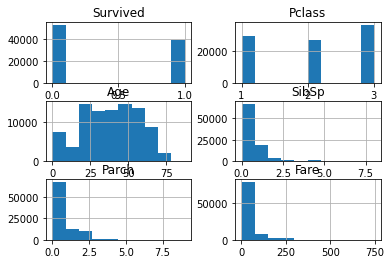

In [280]:
drop_train_data.hist()
#drop_train_data.head()

# Data exploration

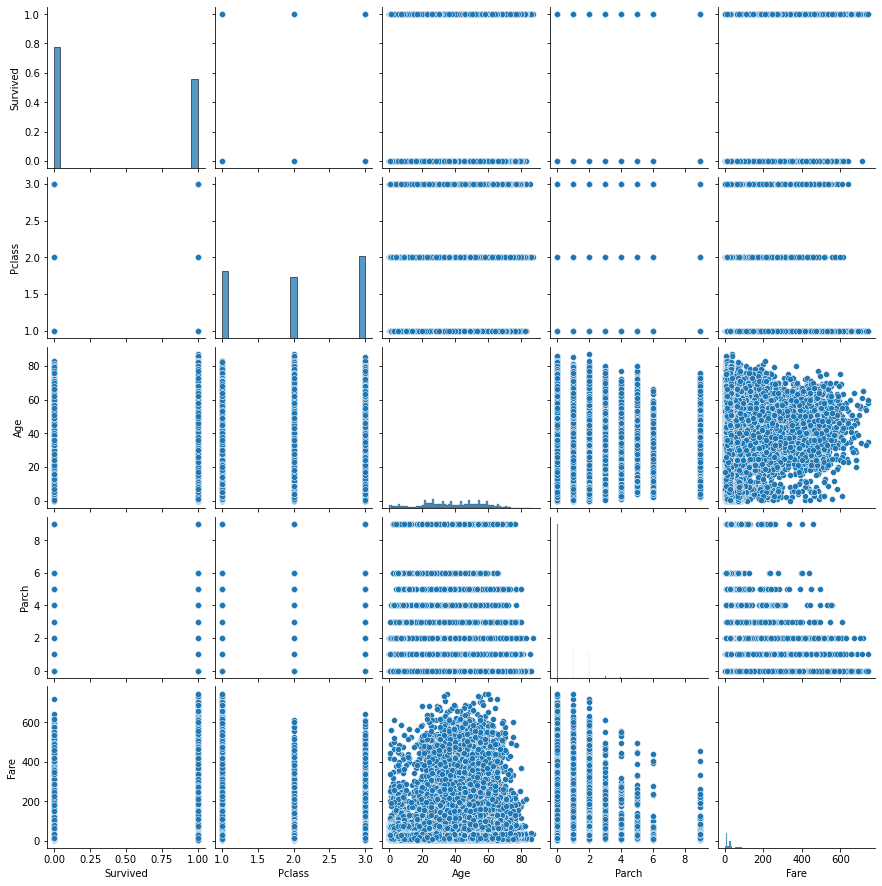

In [281]:
# Парный график, чтобы понять взаимосвязь между всеми возможными парами числовых переменных

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


%config InlineBackend.figure_format = 'png' 

sns.pairplot(drop_train_data[['Survived', 'Pclass', 'Age', 
                 'Parch', 'Fare']])         

C:\Users\ufnfi\AppData\Local\Temp\ipykernel_5936\3095403075.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  drop_train_data['Fare_no_out'] = fare_pclass1_no_out.append(fare_pclass2_no_out)\
C:\Users\ufnfi\AppData\Local\Temp\ipykernel_5936\3095403075.py:14: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  .append(fare_pclass3_no_out)


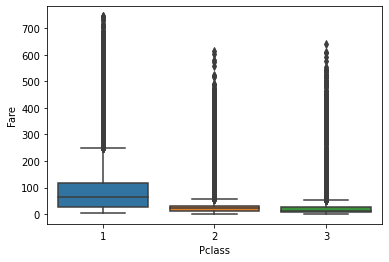

In [282]:
# Зависимость стоимости за билет от класса каюты.
# Плотность распределения стоимости билета в зависимости от класса каюты
sns.boxplot(x='Pclass', y='Fare', data=drop_train_data)

# Есть существенные выбросы. Можно их удалить.
drop_train_data['Fare_no_out'] = drop_train_data['Fare']
fare_pclass1 = drop_train_data[drop_train_data['Pclass'] == 1]['Fare']
fare_pclass2 = drop_train_data[drop_train_data['Pclass'] == 2]['Fare']
fare_pclass3 = drop_train_data[drop_train_data['Pclass'] == 3]['Fare']
fare_pclass1_no_out =fare_pclass1[fare_pclass1.values < (fare_pclass1.values.std())]
fare_pclass2_no_out = fare_pclass2[fare_pclass2.values < (fare_pclass2.values.std())]
fare_pclass3_no_out = fare_pclass3[fare_pclass3.values < (fare_pclass3.values.std())]
drop_train_data['Fare_no_out'] = fare_pclass1_no_out.append(fare_pclass2_no_out)\
                                              .append(fare_pclass3_no_out)


<AxesSubplot:xlabel='Pclass', ylabel='Fare_no_out'>

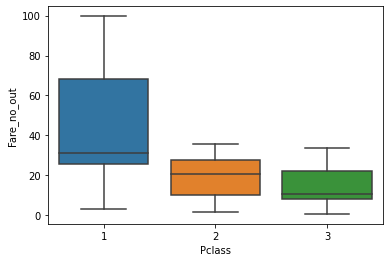

In [283]:
sns.boxplot(x='Pclass', y='Fare_no_out', data=drop_train_data)

<AxesSubplot:>

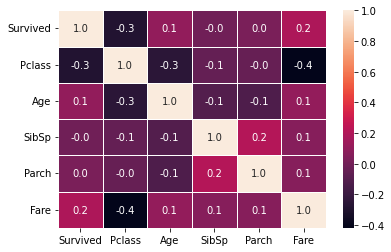

In [284]:
# Посмотрим на корреляции количественных признаков. 

corr_matrix = train_data.drop(['Name', 'Sex', 'Ticket',
                      'Embarked'], axis=1).corr()
sns.heatmap(corr_matrix, annot=True, fmt=".1f", linewidths=.5)

# sns.heatmap(corr_matrix)

# Summary

In [285]:
# Кодируем категориальные признаки `Pclass`, `Sex`, `SibSp`, `Parch` , 'Cabin, и `Embarked` с помощью техники One-Hot-Encoding.

train_data = pd.concat([train_data, pd.get_dummies(train_data['Pclass'], 
                                               prefix="Pclass"),
                      pd.get_dummies(train_data['Sex'], prefix="Sex"),
                      pd.get_dummies(train_data['SibSp'], prefix="SibSp"),
                      pd.get_dummies(train_data['Parch'], prefix="Parch"),
                     pd.get_dummies(train_data['Embarked'], prefix="Embarked")],
                     axis=1)
test_data = pd.concat([test_data, pd.get_dummies(test_data['Pclass'], 
                                             prefix="Pclass"),
                      pd.get_dummies(test_data['Sex'], prefix="Sex"),
                      pd.get_dummies(test_data['SibSp'], prefix="SibSp"),
                      pd.get_dummies(test_data['Parch'], prefix="Parch"),
                    pd.get_dummies(test_data['Embarked'], prefix="Embarked")],
                     axis=1)
train_data.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_C,Embarked_Q,Embarked_S
count,100000.000000,100000.000000,100000,100000,100000.000000,100000.000000,100000.000000,95377,100000.000000,100000,...,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
unique,NaN,NaN,92144,2,NaN,NaN,NaN,75331,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,"Johnson, John",male,NaN,NaN,NaN,A/5,NaN,S,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,31,56114,NaN,NaN,NaN,602,NaN,72389,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.427740,2.106910,NaN,NaN,38.376690,0.397690,0.454560,NaN,43.903242,NaN,...,0.129960,0.11236,0.009830,0.004460,0.003310,0.00204,0.002640,0.221870,0.054240,0.723890
std,0.494753,0.837727,NaN,NaN,18.009956,0.862566,0.950076,NaN,69.545827,NaN,...,0.336261,0.31581,0.098658,0.066634,0.057438,0.04512,0.051313,0.415506,0.226492,0.447074
min,0.000000,1.000000,NaN,NaN,0.080000,0.000000,0.000000,NaN,0.680000,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,NaN,NaN,25.000000,0.000000,0.000000,NaN,10.040000,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,NaN,NaN,39.000000,0.000000,0.000000,NaN,24.460000,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,NaN,NaN,53.000000,1.000000,1.000000,NaN,33.470000,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000


In [286]:
train_data.drop(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 
               'Parch', 'Ticket', 'Embarked'], 
              axis=1, inplace=True)
test_data.drop(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Embarked'], 
             axis=1, inplace=True)
train_data.describe(include='all')

,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_C,Embarked_Q,Embarked_S
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,43.903242,0.303150,0.286790,0.410060,0.43886,0.56114,0.733080,0.197580,0.037030,0.016350,...,0.129960,0.11236,0.009830,0.004460,0.003310,0.00204,0.002640,0.221870,0.054240,0.723890
std,69.545827,0.459622,0.452265,0.491847,0.49625,0.49625,0.442352,0.398176,0.188836,0.126818,...,0.336261,0.31581,0.098658,0.066634,0.057438,0.04512,0.051313,0.415506,0.226492,0.447074
min,0.680000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,10.040000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,24.460000,0.000000,0.000000,0.000000,0.00000,1.00000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000
75%,33.470000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000
max,744.660000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [287]:
train_data.shape, test_data.shape

((100000, 24), (100000, 24))

In [288]:
set(test_data.columns) - set(train_data.columns)

set()

(70000, 24) (30000, 24)
1.0
DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=17)


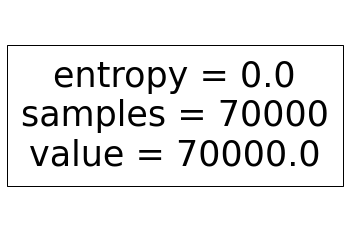

[1 1 1 ... 1 1 1]


In [292]:
# Дерево решений без настройки параметров 
# Оценим соответствие тестовой и обучающей выборки
# Обучим на имеющейся выборке дерево решений (`DecisionTreeClassifier`) максимальной глубины 2. Параметр `random_state=17`

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
%matplotlib inline

X = train_data

X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size=0.3, 
                                                      random_state=17)
print(X_train.shape, X_valid.shape)

first_tree = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=17)
print(np.mean(cross_val_score(first_tree, X_train, y_train, cv=5)))

print(first_tree.fit(X_train, y_train))


from sklearn import tree

tree.plot_tree(first_tree)
plt.savefig('tree.pdf')
plt.show()

from sklearn.metrics import accuracy_score
first_tree_predict = first_tree.predict(X_valid)
print(first_tree_predict)

In [290]:
first_tree.predict(test_data)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [293]:
# Дерево решений с настройкой параметров

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz

tree_titanic = DecisionTreeClassifier(random_state=17)
tree_params = {'max_depth': range(1, 5), 
               'min_samples_leaf': range(1, 5)}

tree_grid = GridSearchCV(tree_titanic, tree_params, cv=5, n_jobs=-1)

print(tree_grid.fit(X_train, y_train))

print(tree_grid.best_params_)
print(tree_grid.best_score_)
accuracy_score(y_valid, tree_grid.predict(X_valid))

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17), n_jobs=-1,
             param_grid={'max_depth': range(1, 5),
                         'min_samples_leaf': range(1, 5)})
{'max_depth': 1, 'min_samples_leaf': 1}
1.0


1.0

In [294]:
tree_grid.predict(test_data)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)